(ch:recursivite)=
# Récursivité

Mis à jour : {sub-ref}`today`, lecture : {sub-ref}`wordcount-minutes`
minutes minimum, PhL.

## Définitions et premiers exemples

### Définition 

> Une construction est _récursive_ si elle se définit à partir d'elle même

  
### Exemples de fonctions récursives

* factorielle : $n ! = n \times (n-1)!$
* somme des $n$ premiers entiers : $s(n) = n + s(n-1)$
* suite de Fibonaci : $f(n+1) = f(n) + f(n-1)$
* suites récurrentes : $u_n = f(u_{n-1})$ ou $u_n = f(u_{n-1},u_{n-2},\dots)$

### Exemple de géométries récursives

* segment et flocon de von Koch

[segments]: fig/cinqsegmentsvk.jpg
[flocons]: fig/cinqflocons.jpg

![][segments]
![][flocons]


* triangle de Sierpinsky

![sierpinsky](fig/sierpinsky.png)

L'[annexe](ann:traceVK) présente comment tracer ces figures à l'aide du module [turtle](https://docs.python.org/fr/3/library/turtle.html).

### Exemples de structures de données récursives

* liste chaînée
![liste](fig/listechainee.png)

* arbre, arbre binaire
![arbrebinaire](fig/arbrebinaire.jpg)

* application : arbre du code Morse (point, tiret)
  ![codemorse](fig/morse-tree.png)  

  
* application : représentation d'une expression
  ![expression](fig/arbreexpression.jpg)   

## Intérêts de la récursion

### Avantage

Une solution _algorithmique récursive_ est souvent plus simple, plus lisible, plus facile à prouver qu'une solution itérative

  * exemple caractéristique : les tours de Hanoï (voir exercice de td)
    ![](fig/hanoi1.jpg)

 Animation de résolution :
 
 [Tower of Hanoi 4 par André Karwath (wikimediacommons)](https://upload.wikimedia.org/wikipedia/commons/6/60/Tower_of_Hanoi_4.gif)
    

### Inconvénient

L'_exécution_ de la solution récursive est plus compliquée
 * gestion d'une pile d'appels de fonctions : la pile d'exécution


L'exécution de la solution récursive peut provoquer des débordements de la mémoire
    

### Paradigme **diviser pour régner**

>  * On divise le problème en des _problèmes similaires_ de taille moindre, 
>  * et ce "récursivement" 
>  * jusqu'à obtenir un problème suffisamment simple ou de taille suffisamment petite pour le résoudre. 

1. Par "récursivement", on entend _répéter_ le découpage en des problèmes _similaires_ de taille de plus en plus réduite.
2. Le "problème suffisamment simple ou de taille suffisamment petite" permet de _terminer_ ces découpages.
    - Il fournit la première solution d'un problème similaire
    - Cette solution est utilisée pour construire _successivement_ les problèmes issus des différentes étapes de découpage.
3. Cette approche _diviser pour régner_ conduit à un algorithme récursif par construction !  
    

Exemples caractéristiques d'algorithmes _diviser pour régner_ dont on connaît déjà des versions itératives.

- recherche dichotomique dans un ensemble trié
- exponentiation (dite) rapide :  
    - $x^{2p} = (x^p)^2$ et 
    - $x^{2p+1} = x \times (x^p)^2$
    
Dans ces 2 exemples, chaque étape découpe en 2 moitiés (ou presque) le problème initial. 

## Fonctions numériques récursives

Une définition, deux écritures équivalentes 

* **forme itérative**

$n ! = 1 \times 2 \times \dots \times (n-1) \times n$

* **forme récursive**

$n ! = n \times (n-1) ! \textbf{ avec }  0! = 1$

Remarque : ces définitions ont un sens pour $n>0$. La valeur de $0!$ doit être définie de façon supplémentaire. 

```{warning} 
Bien différencier en quoi ces 2 écritures sont différentes.
```

### Factorielle : forme itérative

In [1]:
def f(n : int) -> int:
    """Calcul de factorielle n -- version itérative
    entrée : n >= 0
    sortie n!
    """
    res = 1
    for i in range(2,n+1):
        res = res * i
    return res

In [2]:
print("3! =", f(3))
print("1! =", f(1))

3! = 6
1! = 1


In [3]:
# bien que non défini a priori
print("0! =", f(0))
# et même n'importe quoi !
print("-3! =", f(-3))

0! = 1
-3! = 1


```{warning}
ATTENTION : il faudrait **vérifier la validité du paramètre effectif**
```

#### Exercice

* pourquoi ?
* comment ?

```{dropdown} 
Une pré-condition exprimée avec un `assert` permet de garantir que l'_appel_ de la fonction s'effectue selon les hypothèses de son écriture : ici $n >= 0$.

````python
def f(n : int) -> int:
    """Calcul de factorielle n -- version itérative
    entrée : n 
    sortie n!
    """
    assert n >= 0
    res = 1
    for i in range(2,n+1):
        res = res * i
    return res
````
```

### Factorielle : forme récursive

On applique la définition récursive :
$n ! = n \times (n-1) !$

Oui, oui ! On a oublié de définir $0 !$.

On l'écrit quand même ...

#### Premier essai (qui plante :)

In [4]:
def f(n : int) -> int:
    """Calcul de factorielle n -- version récursive
    entrée : n >= 0
    sortie n!
    """
    return n * f(n-1) # récursion

L'exécution suivante déclenche l'erreur suivante :

```python
RecursionError: maximum recursion depth exceeded
```

In [5]:
#print("1! =", f(1))

```{note}
INFO: python limite à 1000 le nombre  d'appels récursifs 

Heureusement ... ce qui nous sauve ici ! 
```

#### Terminaison : pour arrêter les appels récursifs !!!!

In [6]:
def f(n : int) -> int:
    """Calcul de factorielle n -- version récursive
    entrée : n >= 0 
    sortie n!
    """
    if n == 0:          # terminaison
        return 1
    else:
        return n * f(n-1) # récursion

In [7]:
print("3! =", f(3))
print("1! =", f(1))
print("0! =", f(0))

3! = 6
1! = 1
0! = 1


**Analyse du code récursif**

2 instructions `return` :

1. la première retourne une valeur terminale
    - la solution du problème "suffisamment simple" de la stratégie _diviser pour régner_ 
2. la seconde provoque un appel récursif (à elle-même) avant d'effectuer un quelconque calcul !  
    - en effet l'opérande de droite dans la multiplication n'est pas encore connu ...
    - cette écriture correspond au "découpage en un problème similaire de taille moindre" de la stratégie _diviser pour régner_
    

Autre écriture avec 1 seul `return` :

In [8]:
def f(n : int) -> int:
    """Calcul de factorielle n -- version récursive avec un seul return
    entrée : n 
    sortie n!
    """
    if n == 1:          # terminaison
        res = 1
    else:
        res = n * f(n-1) # récursion
    return res

In [9]:
print("3! =", f(3))
print("10! =", f(10))  

3! = 6
10! = 3628800


Enfin l'écriture _équivalente_ suivante explicite la stratégie _diviser pour régner_.  

In [10]:
def f(n : int) -> int:
    """Calcul de factorielle n -- version diviser pour régenr explicite
    entrée : n 
    sortie n!
    """
    if n == 1:             # terminaison sur le problème suffisamment simple
        res = 1
    else:
        app_rec = f(n-1)   # appel récursif sur un problème de taille moindre
        res = n *  app_rec # construction de la solution du problème
    return res

In [11]:
print("3! =", f(3))
print("10! =", f(10))  

3! = 6
10! = 3628800


#### Bien comprendre les appels récursifs !

Deux solutions :

1. Facile : utilisons [pythontutor](https://pythontutor.com/live.html#code=def%20f%28n%20%3A%20int%29%20-%3E%20int%3A%0A%20%20%20%20if%20n%20%3D%3D%200%3A%20%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20return%201%0A%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20return%20n%20*%20f%28n-1%29%20%0Ar%20%3D%20f%285%29&cumulative=false&curInstr=26&heapPrimitives=nevernest&mode=display&origin=opt-live.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) pour calculer $5 !$

2. Plus lourd : on va, de **façon exceptionnelle**, mettre des affichages dans le corps de la fonctions récursive pour bien comprendre.
Pour cela, on décortique bien la fonction.

In [12]:
def f(n: int) -> int:
    """Calcul de factorielle n -- version récursive
    entrée : n >= 0
    sortie n!
    """
    # pour voir les imbrications des appels
    global nb
    # on met a jour indent avant chaque return
    
    nb = nb + 1 # on ajoute .... à chaque appel
    indent = nb * "...."
    print(indent, "entrée dans f(", n, ")")
    
    if n == 1:     
        print(indent, "terminaison : on renvoit 1 pour n = ", n)
        nb = nb - 1 # on enleve .. avant un return
        return 1
    
    else:
        print(indent, n,"* f(", n-1,") = ?")
    
        print(indent, "appel de f(", n-1,")")
        r = f(n-1)
        print(indent, "on a calculé f(", n-1, ")")

        p = n * r
        print(indent, "on a fait le produit ", n,"* f(", n-1,")")
        print(indent, "Retour de la valeur", p)

        nb = nb - 1 # on enleve .. avant un return
        return p # récursion

In [13]:
nb = 0
f(4)
print(nb)

.... entrée dans f( 4 )
.... 4 * f( 3 ) = ?
.... appel de f( 3 )
........ entrée dans f( 3 )
........ 3 * f( 2 ) = ?
........ appel de f( 2 )
............ entrée dans f( 2 )
............ 2 * f( 1 ) = ?
............ appel de f( 1 )
................ entrée dans f( 1 )
................ terminaison : on renvoit 1 pour n =  1
............ on a calculé f( 1 )
............ on a fait le produit  2 * f( 1 )
............ Retour de la valeur 2
........ on a calculé f( 2 )
........ on a fait le produit  3 * f( 2 )
........ Retour de la valeur 6
.... on a calculé f( 3 )
.... on a fait le produit  4 * f( 3 )
.... Retour de la valeur 24
0


```{admonition} Conseil
Bien regarder le moment où on effectue la **première** multiplication
```

Exercice :

* Combien de variables _locales_ `r` et `p` ont été utilisées ?


```{dropdown} Réponse :

* Chaque appel à `f()` introduit une nouvelle paire `r` et `p`
* Ces variables sont _locales_ à l'appel concerné :
    - elles sont introduites et évaluées dans l'_environnement_ (le contexte) de l'appel concerné 

Ces notions seront approfondies plus loin.
```

## Exponentiation entière (dite) rapide


Objectif : calculer $x^n$ où $x$ est un réel et $n$ un entier positif.

### Une première récursion

Elle est basée sur la relation récursive : $x^n = x \times x^{n-1}$ et $x^0 = 1$, pour $n > 0$.

In [14]:
def expo(x: float, n: int) -> float:
    '''calcule x**n : version récursive naturelle 
    entrées : x (float), n (int) >= 0'''
    if n == 0:
        return 1
    else:
        return x * expo(x, n-1)

In [15]:
expo(2.0 ,1000)

1.0715086071862673e+301

**Exercice :**

* Ecrire une version itérative 
* Ecrire une autre version récursive avec 1 seul `return`
* Ecrire une autre version récursive qui exhibe les étapes _diviser pour régner_

### Une seconde récursion rapide, beaucoup plus rapide

Autre écriture de $x^n$ avec des airs de dichotomie :) 
* $x^{2p} = (x^p)^2$ -- c'est simple et récursif, non ?
* $x^{2p+1} = x \times (x^p)^2$ --  c'est simple et aussi récursif, non ?

In [16]:
def expo_rapide(x: float, n: int) -> float:
    '''calcule x**n : version récursive rapide 
    entrées : x (float), n (int)'''
    if n == 0:
        return 1
    else:
        r =  expo_rapide(x, n//2) # appel recursif sur exposant moitié
        
        if (n % 2 == 0): # construction si n est pair
            res = r * r        
        else:            # construction si n est impair
            res = x * r * r
        
        return res

In [17]:
expo_rapide(2.0, 1000)  

1.0715086071862673e+301

In [18]:
def expo_rapide_aff(x: float, n: int, aff = False) -> float:
    '''calcule x**n : version récursive rapide, version avec affichage
    entrées : x (float), n (int)'''
    if n == 0:
        if aff:
            print("terminaison")
        return 1
    else:
        if aff:
            print("appel pour n =", n)
        r =  expo_rapide_aff(x, n//2, aff) # apple récursif
        
        if aff:
            print("retour de n//2 :", r )
            
        if (n % 2 == 0): # n est pair
            res = r * r
            if aff:
                print("cas pair et res =", res)
        else:            # n est impair
            res = x * r * r
            if aff:
                print("cas impair et res =", res)
        return res

In [19]:
expo_rapide_aff(2.0, 5, True)  

appel pour n = 5
appel pour n = 2
appel pour n = 1
terminaison
retour de n//2 : 1
cas impair et res = 2.0
retour de n//2 : 2.0
cas pair et res = 4.0
retour de n//2 : 4.0
cas impair et res = 32.0


32.0

**($\star$) Exercice**

Exhibons que `expo_rapide()`est effectivement plus rapide que `expo`  

On en profite pour utiliser le module [`timeit`](https://docs.python.org/fr/3/library/timeit.html).
Ce module complète (et utilise) le module _time_ déjà décrit dans le 
[chapitre Modules utiles](ch:modulesutiles) pour :
* automatiquement répéter la partie de code à mesurer (si elle prend très peu de temps) --> option `-n`
* ou automatiquement répéter les mesures et les analyser : garder la meilleure, regarder la moyenne ... --> option `r`

`timeit` peut s'utiliser depuis la ligne de commandes ou depuis l'interpréteur python (ici jupyter) par sous la forme d'une "fonction magique" reconnaissable à sa syntaxe `%`.

*Rmq.* Bien sûr, l'exécution de la cellule suivante n'est pas instantanée.

In [20]:
# timeit plus fiable : répète plusieurs mesures
%timeit expo(3,20)
%timeit expo_rapide(3,20)
print()

%timeit -n 100 expo(3,20)
%timeit -n 100 expo_rapide(3,20)
print()


%timeit -r 5 expo(3,20)
%timeit -r 5 expo_rapide(3,20)

2.88 µs ± 102 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.09 µs ± 5.38 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

2.78 µs ± 132 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.12 µs ± 80.3 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)

2.82 µs ± 28.3 ns per loop (mean ± std. dev. of 5 runs, 100000 loops each)
1.09 µs ± 3.67 ns per loop (mean ± std. dev. of 5 runs, 1000000 loops each)


## Fibonacci ou l'inefficacité de la récursion

La suite de Fibonaci est définie par une récurrence _d'ordre 2_ :

$$F(n+1) = F(n) + F(n-1).$$

Ce qui nécessite de connaître 2 valeurs de départ :
$$F(0) = F(1) = 1.$$

### Solution récursive

L'expression est naturellement récursive donc ...

In [21]:
def fibo(n: int) -> int:
    '''Fibonacci : solution récursive classique '''
    if n == 0 or n == 1:
        return 1
    else:
        return fibo(n-1) + fibo(n-2)

In [22]:
for i in range(10):
    print(i,":", fibo(i))

0 : 1
1 : 1
2 : 2
3 : 3
4 : 5
5 : 8
6 : 13
7 : 21
8 : 34
9 : 55


Observons que cette solution récursive est beaucoup plus lente que la solution itérative.

In [23]:
def fibo_iter(n: int) -> int:
    '''Une version itérative de Fibonacci'''
    f0 = 1
    f1 = 1
    for i in range(2, n+1):
        f = f0 + f1
        f0 = f1
        f1 = f  
    return f

On s'assure de la correction des 2 traitements.

In [24]:
assert fibo(15) == fibo_iter(15) 

Et on compare les temps d'exécutions de ces 2 versions.

In [25]:
%timeit -r 5 fibo(15)
%timeit -r 5 fibo_iter(15)

249 µs ± 5.81 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)
895 ns ± 12.4 ns per loop (mean ± std. dev. of 5 runs, 1000000 loops each)


On observe ici un temps de calcul 3 à 5 fois supérieur avec la version récursive.
Pourtant `n = 15` n'est pas une très grande valeur _a priori_;
On vous laisse observer que ce comportement se dégrade de plus de plus significativement quand `n` augmente ...

Pour d'abord expliquer pourquoi cette solution récursive est inefficace en pratique, étudions maintenant plus en détail comment s'exécute un appel récursif.

## Appels récursifs : environnement,  pile d'exécution, pile et arbre des appels

On s'intéresse à des notions liées _à la mise en oeuvre_ des appels de fonction dans le cadre récursif.  
On en restera surtout aux principes, aux _abstractions algorithmiques_.  
Les aspects plus détaillés de la mise en oeuvre (implantation du mécanisme d'appel de fonction) sont étudiés en deuxième année.  

### Environnement

Chaque appel récursif nécessite de construire **dynamiquement** un nouvel **environnement** avec les informations suivantes :

* Où retourner le résultat de l'appel ? (une ou des adresses de retour)
* Quelles valeurs ont les paramètres effectifs de l'appel ?
* Où stocker les variables locales nécessaires au traitement de l'appel ?

En pratique, on ne connaît pas le nombre de fois où une/des fonctions sont appelées.  
Toutes ces informations sont donc  stockées dans une  _pile d'exécution_ ou _pile des appels_.  
Une pile est une structure de donnée adaptée au stockage et à une certain type de traitements : empiler et dépiler.

### Pile d'exécution

La **pile d'exécution** est la mémoire associée nécessaire au stockage des paramètres d'appel, des adresses de retour, des variables locales
- gérée par le langage de programmation : une pile LIFO (_last in, first out_) de taille préfixée
- mais risque de débordement mémoire si appels imbriqués trop nombreux -- sans libération de la place occupée.

En python : 1000 appels au maximum ou trop volumineux

Imaginons un paramètre tableau de grande taille réduit récursivement de 1 élément par 1 élément ...  
- Exemple : sommer récursivement les n valeurs d'un tableau.

Qui plus est si la récursion consiste en plusieurs appels  comme la suite de Fibonacci : $f(n+1) = f(n) + f(n-1)$.
- C'est un exemple de _récursion multiple_.

<DIV class="alert alert-danger">

En pratique : `stack overflow !` est le message classique quand ... ça ne va pas : 

</DIV>

### Pile des appels

La **pile des appels** est une _abstraction algorithmique_ qui représente la logique de la pile d'exécution **en se limitant à l'identifiant de chaque appel**.  
On ne détaille pas l'environnement de chaque appel.

### Arbre des appels récursifs

L'**arbre des appels récursifs** est une autre _abstraction algorithmique_ de l'ensemble des appels d'un traitement récursif.  
Le parcours des noeuds d'un arbre se représente aussi avec une pile ... d'où la connexion entre ces deux abstractions du traitement de la récursion.  

### Illustration sur la factorielle récursive

Calcul de `fact(4)` 

![factorielle(4)](./fig/fact4.jpg)

**Rmq.** 
On a régulièrement besoin de dessiner des graphes. Il existe de nombreux outils à cet effet.
Dans [cette annexe](ann:graphviz), nous  montrons comment utiliser depuis des petits codes python, le langage `dot`et le module `graphviz` -- tous les deux très classiques en la matière.
**Ces aspects sont hors du programme de ce chapitre.**

#### arbre des appels

La représentation suivante exhibe l'_arbre des appels_ récursif de `f`

![](./fig/fact4_dot.jpg)

Ici, les calculs intermédiaires sont simples (1 multiplication) et on peut compléter cet arbre des appels en exhibant les opérandes de ces calculs. 

![](./fig/fact4_complet.jpg)

#### pile des appels

L'évolution de la pile des appels lors du calcule de $4!$ s'obtient en parcourant l'arbre des appels "en profondeur d'abord".  
On note `fact( )` par `f( )`.  

On représente **l'évolution de la pile des appels sur un axe _horizontal_ qui décrit le temps** (de la gauche vers la droite).  
La pile est représentée à chacun de ces changements d'_état_ :  
- la pile est  vide avant l'appel récursif principal  
- chaque appel récursif _empile_ son contexte : on le note par l'appel lui-même 
    - exemple : `f(4)` est l'appel principal du calcul de $4!$ et dénote aussi l'environnement de cet appel  
- chaque retour de valeur à l'appelant a pour effet de _dépiler_ l'environnement de l'appelé  
Ainsi la pile redevient vide après le traitement complet de l'appel principal.

Dans les affichages successifs, chaque colonne (verticale) représente l'état de la pile à un instant donné de l'exécution récursive -- comme une suite de photographies de cette pile.  La bas de la pile est le bas de la colonne.  

**Construction de la pile des appels du calcul de $4!$ :**

- avant l'appel principal :  la pile est vide  
        . 
  

- l'appel principal : on empile f(4)  
        . f(4)  

- dans f(4), l'appel de f(3) : on empile f(3)  
               f(3) 
        . f(4) f(4)   

- dans f(3), l'appel de f(2) : on empile f(2)  
                  f(2) 
             f(3) f(3) 
      . f(4) f(4) f(4)   

- dans f(2), l'appel de f(1) : on empile f(1) 
                       f(1)
                  f(2) f(2) 
             f(3) f(3) f(3) 
      . f(4) f(4) f(4) f(4)   

- f(1) est terminal (cet appel renvoie une valeur (1)) : on dépile f(1)
                       f(1)
                  f(2) f(2) f(2)
             f(3) f(3) f(3) f(3)
      . f(4) f(4) f(4) f(4) f(4)  
  

- f(2) est calculé et cet appel renvoie la valeur 1x2 : on dépile f(2)
                       f(1)
                  f(2) f(2) f(2)
             f(3) f(3) f(3) f(3) f(3)
      . f(4) f(4) f(4) f(4) f(4) f(4)  
  

- f(3) est calculé et cet appel renvoit la valeur 1x2x3 : on dépile f(3)
                       f(1)
                  f(2) f(2) f(2)
             f(3) f(3) f(3) f(3) f(3)
      . f(4) f(4) f(4) f(4) f(4) f(4) f(4)  
  

- f(4) est calculé et cet appel renvoie la valeur 1x2x3x4 : on dépile f(4)
                       f(1)
                  f(2) f(2) f(2)
             f(3) f(3) f(3) f(3) f(3)
      . f(4) f(4) f(4) f(4) f(4) f(4) f(4)  
   

- la pile est vide et on a bien obtenu le résultat attendu (24)
                       f(1)
                  f(2) f(2) f(2)
             f(3) f(3) f(3) f(3) f(3)
      . f(4) f(4) f(4) f(4) f(4) f(4) f(4) .   

####  environnements successifs pour factorielle(3) 

On peut le détailler un peu plus dans ce cas simple.

appel = f(3)

```python
def f(n):
    """Calcul de factorielle n -- version récursive
    entrée : n 
    sortie n!
    """
    if n == 1:     
        return 1   
    else:
        r = f(n-1)
        p = n * r
        return p # récursion

```

L'environnement de chaque appel est décrit par une colonne du tableau suivant.

   . |   0   |  1    |  2    |   3        
-----|-------|-------|-------|--------  
1    | r=f(3)| n=3   |       |          
2    |       | r=f(2)| n=2   |          
3    |       |       | r=f(1)| n=1      
4    |       |       |       | return 1  
5    |       |       | p=2\*1 |  
6    |       |       | return 2|   
7    |       | p=3\*2|       |  
8    |       | return 6|     |  
9    | r = 6 |       |       | 
  
    

### Illustration sur le calcul récursif de la suite de Fibonacci.

On peut maintenant revenir sur les raisons de l'inefficacité du calcul récursif de la suite de Fibonacci.

#### arbre des appels

* Le calcul de `fibo(4)` correspond à un parcours "en profondeur d'abord" de l'**arbre des appels** suivant.

![arbre appels fibo(4)](./fig/arbre-fibo4.jpg)

#### pile des appels récursifs

On note `fibo()` par `f()`  
Les appels récursifs sont empilés (avec leur environnement) dans une _pile d'appels_  
Les appels avec terminaison permettent de dépiler l'appelant  
L'appel principal est exécuté une fois la pile vidée


                   f(1) f(0)
              f(2) f(2) f(2) f(2)      f(1)                f(1) f(0)
         f(3) f(3) f(3) f(3) f(3) f(3) f(3) f(3)      f(2) f(2) f(2) f(2)
    f(4) f(4) f(4) f(4) f(4) f(4) f(4) f(4) f(4) f(4) f(4) f(4) f(4) f(4) f(4)


### Retour sur l'inefficacité du calcul récursif de Fibonacci

Exercice : comptons le nombre d'appels à `fibo()` dans l'évaluation de `fibo(4)`.

 fibo(4) | #appels 
---------|:-------:
 fibo(0) |  2
 fibo(1) |  3
 fibo(2) |  2
 fibo(3) |  1 
 _total_ |  _8_
 
 Ces évaluations intermédiaires répétées engendrent des _sur-coûts_ en mémoire et en calcul qui dégradent l'efficacité de l'évaluation récursive de `fibo( )`.  


#### environnements et pile d'exécution 

Profitons du python tutor pour visualiser l'enchaînement des appels et l'évolution de l'environnement :

https://goo.gl/mHi50H

### Solution itérative

On a déjà montré une solution itérative de ce calcul.

**($\star$) Exercice.**

Proposer une solution itérative encore plus efficace que celle présentée.

```{topdown} Indication

Avancer dans l'itération en stockant toutes les valeurs déjà calculées.

La solution itérative est plus efficace car elle évite de re-calculer les termes déjà calculés.  

```


### Exercice

Reprendre ça sous http://pythontutor.com/live.html#mode=edit

## Les tours de Hanoï

### Objectif

Déplacer l'empilement de disques du piquet gauche au piquet droit en respectant les règles suivantes :  
* déplacer un seul disque à la fois
* un disque ne peut être posé que sur un disque de diamètre supérieur
On doit utiliser le piquet du milieu.

début -> fin 
![hanoi_debut](fig/hanoi1.jpg) ![hanoi_fin](fig/hanoi2.jpg)


### Solution récursive

#### Analyse
* On  note les piquets A, B, C de la gauche vers la droite.  Départ = A, objectif = C
* On note $n$ le nombre de disques à déplacer ; ici $n=4$
* On veut donc **résoudre le problème des tours de Hoanoi de taille 4 en allant de A vers C grâce à l'utilisation de B**
    - notons la résolution de ce problème `Hanoi(4, A, C, B)` 
    - plus généralement : **Hanoi(n, départ, arrivée, intermédiaire)**
    

**Récursion**  
Si on déplace _l'empilement complet avec les 3 disques supérieurs_ de A vers B en utilisant C (dur), ensuite on déplace le dernier (plus grand) disque de A vers C (facile), il ne reste qu'à déplacer l'empilement complet de 3 disques de B vers C en utilisant A (moins dur vu qu'on pu le faire à l'étape 1)
* déplacer un empilement complet de 3 disques de A vers B (en utilisant C) = `Hanoi(3, A, B, C)`
* déplacer le disque qui reste sur A vers C = `Hanoi(1, A, C, B)` ... oui: B ne sert à rien
* déplacer un empilement complet de 3 disques de B vers C (en utilisant A) = `Hanoi(3, B, C, A)`


<div class="alert alert-success">
    
On tient la récursion ! 3 appels à `Hanoi` pour calculer `Hanoi` !!

</div>

**Avec un graphique**

* On part de là : avec un empilement de 4 disques sur A à déplacer vers C
![hanoi_rec0](fig/resized/hanoi_rec0.png)

* On identifie un empilement de taille inférieure : 3 disques regroupés en rose
![hanoi_rec1](fig/resized/hanoi_rec1.png)

* On suppose qu'on est capable de déplacer _correctement_ l'empilement rose de A vers B (en utilisant C)
![hanoi_rec2](fig/resized/hanoi_rec2.png)

* On déplace le dernier disque restant sur A vers C : il est à sa bonne place
![hanoi_rec3](fig/resized/hanoi_rec3.png)

* Comme deux étapes avant, on suppose qu'on est capable de déplacer _correctement_ l'empilement rose de B vers C (en utilisant A). L'empilement rose est bien placé maintenant
![hanoi_rec4](fig/resized/hanoi_rec4.png)

* et le problème initial est bien résolu !
![hanoi_rec5](fig/resized/hanoi_rec5.png)

**Terminaison pour la récursion**
* on termine quand on sait résoudre le problème car il est suffisamment simple :
    - on déplace **un disque** 
    - c'est `Hanoi(1, ...)`

    
_Remarque :_ pour une solution itérative, une terminaison naturelle serait "quand tous les disques ont été déplacés", i.e. quand le piquet de départ est vide

**Déplacer $(n-1)$ disques : étape dure ?**  
* NON : on "retombe" sur la résolution de Hanoi pour un nombre de disque diminué de 1 ...  
* ce qui devrait à un moment ne plus laisser aucun disque à déplacer :)
On formalisera plus tard cette analyse de la _terminaison_ de la solution récursive. 

#### Codage 

Yapluka !

On commence avec `hanoi0` pour exhiber un détail technique

In [26]:
def hanoi0(n: int, depart, arrivee, interm) -> None:
    '''tours de hanoi :  déplacer n disques de 
    depart vers arrivee en utilisant interm 
    (et en respectant les règles de déplacement du pb des tours de Hanoi)
    '''
    if n > 0:
        hanoi0(n-1, depart, interm, arrivee)
        hanoi0(1, depart, arrivee, interm)
        hanoi0(n-1, interm, arrivee, depart)                

L'appel suivant déclenche une erreur.

```python
''' resolution : appel '''
hanoi0(4, A, C, B)
```

En effet, les piquets `A, B, C` n'existent pas en tant qu'objet (variable) python.
On remarque que l'en-tête de la fonction était silencieuse à ce sujet ...

Pour rendre effectif un traitement, 
* les piquets sont les _caractères_ : `'A'`, `'B'`, `'C'`  
* il suffit alors d'indiquer le déplacement `(Hanoi(1, ...)` par un `print`:
    -  `hanoi(1, depart, arrivee, interm)` devient  `print(depart -> arrivee)`
    - ce qui montre bien qu'interm est inutile quand le nb de disques égal 1
    
L'exécution de l'algo va donner tous les déplacements _d'1 disque_ à appliquer au pb pour le résoudre  

In [27]:
def hanoi(n: int, depart: str, arrivee: str, interm: str) -> None:
    '''affiche les déplacements pour déplacer n disques de 
    depart vers arrivee en utilisant interm 
    (et en respectant les règles de déplacement du pb des tours de Hanoi)
    '''
    if n > 0:
        hanoi(n-1, depart, interm, arrivee)
        print(depart, '-->', arrivee)
        hanoi(n-1, interm, arrivee, depart)        
        
'''appel'''
hanoi(4, 'A', 'C', 'B')

A --> B
A --> C
B --> C
A --> B
C --> A
C --> B
A --> B
A --> C
B --> C
B --> A
C --> A
B --> C
A --> B
A --> C
B --> C


<div class="alert alert-danger">

ATTENTION : il y a 0 `return` et 1 `print` ... et pourtant l'algorithme termine et (semble) donner les déplacements qui résolvent le pb ... C'est un biais pédagogique introduit par la _modélisation_ des piquets par des caractères (difficile de faire autre chose que des `print` sur des caractères). Vous reprendrez cette résolution lorsque vous saurez représenter les empilements de disques par ... des piles.

</div>

In [28]:
''' appels simples pour se convaincre que ça marche et ...'''
#hanoi(1, 'A', 'C', 'B')
print("---------")
hanoi(2, 'A', 'C', 'B')
print("---------")
hanoi(3, 'A', 'C', 'B')

---------
A --> B
A --> C
B --> C
---------
A --> C
A --> B
C --> B
A --> C
B --> A
B --> C
A --> C


**Exercice**  
Exécuter "à la main" les déplacements de `hanoi(3)`et `hanoi(4)` en numérotant les disques (1,2,3,...) et les piquets (A,B,C)  
et vérifier que les problèmes sont effectivement résolus !

### Observation ... inquiétante

\# disques | \# déplacements
:----------:|:--------------:
2 | 3
3 | 7
4 | 15

Normal ?
* $n=1$ : OK pour hanoi(1) = 1 seul déplacement
* $n=2$ : 3 appels à hanoi(1) donc $3\times1 = 3$ 
* $n=3$ : 2 hanoi(2) + 1 hanoi(1) = $2\times 3 + 1 \times 1 = 7$
* $n=4$ : 2 hanoi(3) + 1 hanoi(1) = $2\times 7 + 1 \times 1 = 15$

et ainsi de suite ... 
* ca augmente assez vite 
* on formalisera cette analyse de _complexité_ dans un prochain chapitre.

**Exercices**
* Coder un algo qui calcule le nombre de déplacements pour $n = 2, 3, \dots, 12$ et pour plus ensuite 
* Modifier `hanoi()` pour compter le nombre de déplacements total 




In [29]:
a = 1
for i in range(1, 13):
    c = 2*a + 1
    print(i+1, 'disques  -> ', c, 'déplacements')
    a = c
print("Ca vous fait penser à quelque chose :) ?")

2 disques  ->  3 déplacements
3 disques  ->  7 déplacements
4 disques  ->  15 déplacements
5 disques  ->  31 déplacements
6 disques  ->  63 déplacements
7 disques  ->  127 déplacements
8 disques  ->  255 déplacements
9 disques  ->  511 déplacements
10 disques  ->  1023 déplacements
11 disques  ->  2047 déplacements
12 disques  ->  4095 déplacements
13 disques  ->  8191 déplacements
Ca vous fait penser à quelque chose :) ?


## Compléments

### Compléments 

Des ressources utiles :

*  sur interstices.info : [hanoi_interstices](https://interstices.info/jcms/p_82121/les-tours-de-hanoi-un-probleme-classique-de-recursion)
* un [mooc](https://programmation-recursive-2.appspot.com/coursehttps://programmation-recursive-2.appspot.com/course) sur la récursivité (UPMC)


### A venir

1. Autres algorithmes récursifs importants
    - recherche séquentielle et dichotomique : voir chapitre "Rechercher"    
    - trier : tri fusion, tri rapide : voir chapitre "Trier"  
2. Etablir la complexité d'algos récursifs
    - La fonction de complexité est une suite récursive : la complexité de la résolution récursive d'un problème de taille n est fonction de la complexité de la résolution (récursive) du problème de taille réduite.
    - exemple : $C(n) = 2 \times C(n/2) + 1$ et $C(1) = 1$
    - autre exemple : $C(n) = p \times C(n/p) + f(p)$ et $C(1) = 1$
    - ...
    - est traité en dernière partie du chapitre "Complexités"  
3. Prouver la terminaison et la correction de ces algos récursifs
    - est traité dans le chapitre "Prouver"  
4. Dé-récursifier : récursif -> itératif (quand on peut)
    - voir les slides du cours de 2016 : http://perso.univ-perp.fr/langlois/images/pdf/ens/L1/s7-sl4.pdf 

## Annexes

(ann:traceVK)=
### Pour tracer des segments de Von Koch avec turtle !

Turtle utilise un affichage dans une fenêtre extérieure via tcl-tk.  
Il est possible que cet affichage cohabite mal avec le notebook jupyter.  
Il est préférable d'exécuter ces séquences de code python hors du notebook (idle, terminal, ...).  

In [30]:
import turtle as t
#help(t)

```python
"""Turtle : mouvements elementaires"""

# init : taille ecran en pixels, clear ecran, reset des variablesm
t.screensize(500,500)
t.reset()
t.hideturtle() # pour aller plus vite
t.degrees() # angles en deg
```

```python
'''Utilise le module turtle 
Ouvre une fenêtre 
et trace 3 segments de VK
'''

def segment(d, n, color="black"):
    """segment de von Koch
    recursion sur n pour decouper le segment de longueur d et
    tracer d (longueur du segment) pixels si n==0"""
    t.pencolor(color)        

    if n==0:
        t.forward(d)
    else:
        dsur3 = d//3
        segment(dsur3, n-1)
        t.left(60)
        segment(dsur3, n-1)
        t.right(120)
        segment(dsur3, n-1)
        t.left(60)
        segment(dsur3, n-1)

# init        
t.screensize(500,500)
t.reset()
t.hideturtle() # pour aller plus vite
t.degrees() # angles en deg

# taille
d = 300
#nbiter = input("nombre d'iterations = ")
nbiter = 1
h = 150 # espace vertical entre 2 traces

# point de depart
a = (-200, 400)

# trace et changement point de depart
for i in range(nbiter):
    # deplacement au point de depart
    t.up()
    t.goto(a)
    t.down()

    # trace 
    segment(d, i)
    
    # maj point de depart
    a = (a[0], a[1] - h)

# pour attendre avant d'effacer la fenetre turtle
v = input("OK ?")
t.reset()

# pour que le trace reste a l ecran
t. mainloop()
```

```python
'''trace (nbiter) flocons de VK'''
def flocon(d, n, color="black"):
    ''' trace flocon de VK en utilisant segment'''
    segment(d, n, color)
    t.right(120)
    segment(d, n, color)
    t.right(120)
    segment(d, n, color)
    t.right(120)

#nbiter = input("nombre d'iterations = ")
nbiter = 3
h = 150 # espace vertical entre 2 traces
a = (-200, 200) # point de depart
d = 84  # taille

# trace et changement point de depart
for i in range(nbiter):
    # deplacement au point de depart
    t.up()
    t.goto(a)
    t.down()

    # trace 
    flocon(d, i)
    
    # maj point de depart
    a = (a[0], a[1] - h)

# pour attendre avant d'effacer la fenetre turtle
v = input("OK ?")
t.reset()
 ```  

(ann:graphviz)=
### Pour tracer des graphes

Un arbre est un graphe.
Commençons avec une première construction simple de l'arbre des appels de `fact(4)`.

In [31]:
import graphviz as gvz
import functools

#help(gvz)

In [32]:
''' arbre des appels du calcul de fact(4) : construction simple'''
fact4 = gvz.Digraph(format='jpg')
fact4.node('f4', label='fact(4)')
fact4.node('f3', label='fact(3)')
fact4.node('f2', label='fact(2)')
fact4.node('f1', label='fact(1)', color='red')
fact4.edge('f4', 'f3')
fact4.edge('f3', 'f2')
fact4.edge('f2', 'f1')

file_out = fact4.render('fig/fact4_dot')

Affichage arbre construit avec le code précédent


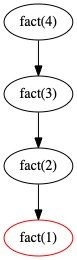

In [33]:
'''Affichage arbre construit avec le code précédent'''
from IPython.display import display, Image
print(__doc__)
display(Image('fig/fact4_dot.jpg'))

Arbre des appels du calcul de fact(4) : construction plus complète

In [34]:
''' arbre des appels du calcul de fact(4) : construction plus complète'''

digraph = functools.partial(gvz.Digraph, format='jpg')

def add_nodes(graph, nodes):
    for n in nodes:
        if isinstance(n, tuple):
            graph.node(n[0], **n[1])
        else:
            graph.node(n)
    return graph

def add_edges(graph, edges):
    for e in edges:
        if isinstance(e[0], tuple):
            graph.edge(*e[0], **e[1])
        else:
            graph.edge(*e)
    return graph

''' arbre complet de l'évaluation fact(4)'''
fact4_complet = add_edges(
    add_nodes(digraph(), [
        ('4'), ('3'), ('2'),
        ('f4', {'label': 'fact(4)'}),
        ('f3', {'label': 'fact(3)'}),
        ('f2', {'label': 'fact(2)'}),
        ('f1', {'label': 'fact(1)', 'color':'red'}),
    ]),
    [
        ('f4', '4'),
        ('f3', '3'),
        ('f2', '2'),
        ('f4', 'f3'),
        ('f3', 'f2'),
        ('f2', 'f1')
    ]
).render('fig/fact4_complet')

Affichage arbre


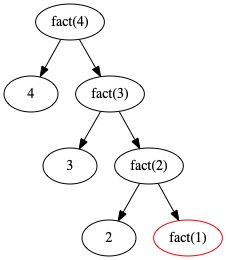

In [35]:
'''Affichage arbre'''
from IPython.display import display, Image
print(__doc__)
display(Image('fig/fact4_complet.jpg'))